In [25]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt



In [24]:
df = pd.read_csv("SuperMarket Analysis.csv")


In [26]:
df.head()      


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [27]:
df.shape


(1000, 17)

In [28]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [35]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
Day                        0
dtype: int64

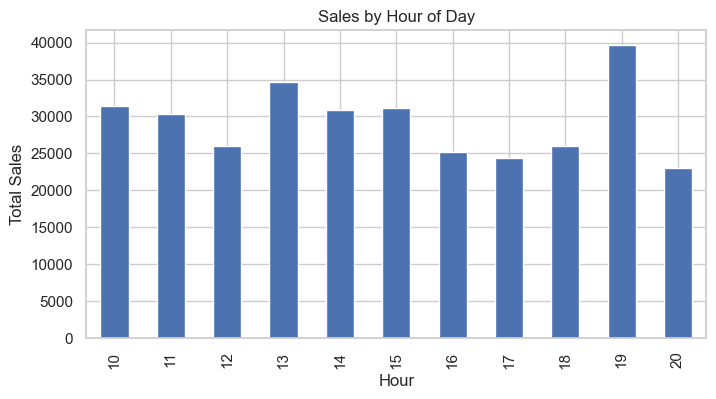

In [43]:
hourly_sales = df.groupby('Hour')['Sales'].sum()

plt.figure(figsize=(8,4))
hourly_sales.plot(kind='bar')
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()


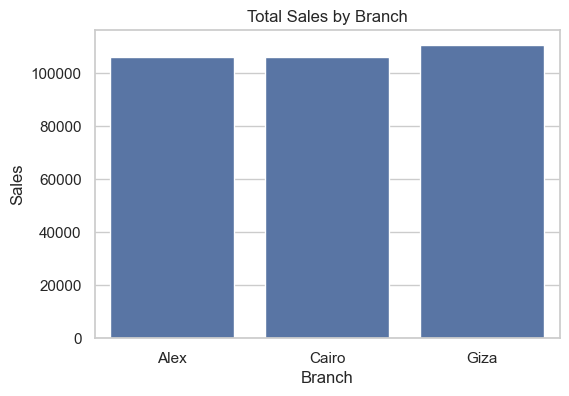

In [44]:
branch_sales = df.groupby('Branch')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Branch', y='Sales', data=branch_sales)
plt.title("Total Sales by Branch")
plt.show()


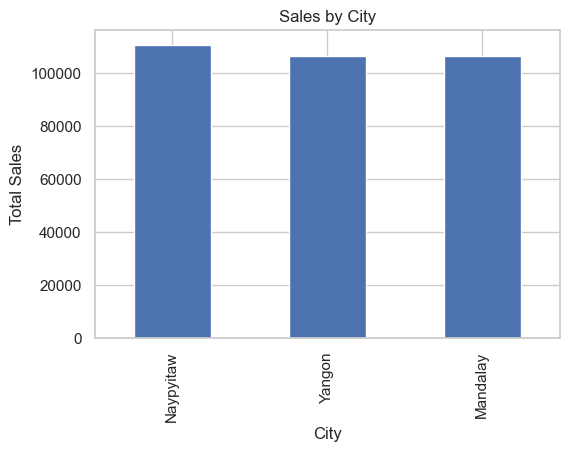

In [45]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
city_sales.plot(kind='bar')
plt.title("Sales by City")
plt.ylabel("Total Sales")
plt.show()


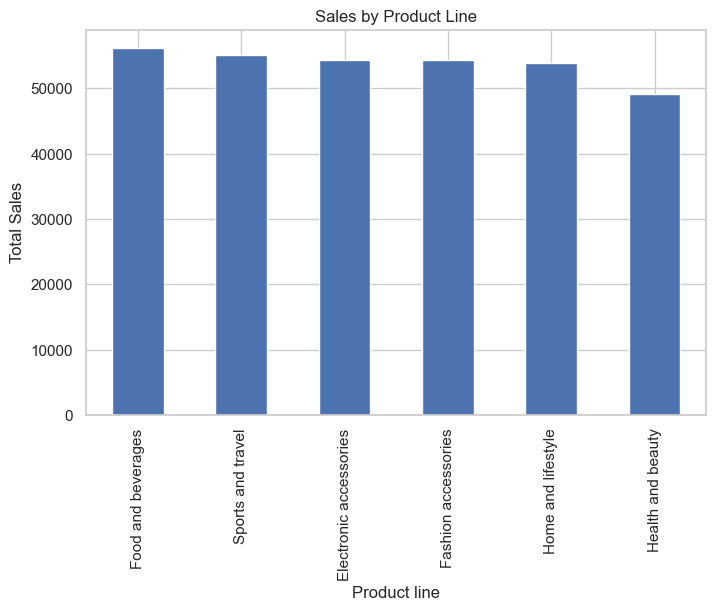

In [46]:
product_sales = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
product_sales.plot(kind='bar')
plt.title("Sales by Product Line")
plt.ylabel("Total Sales")
plt.show()


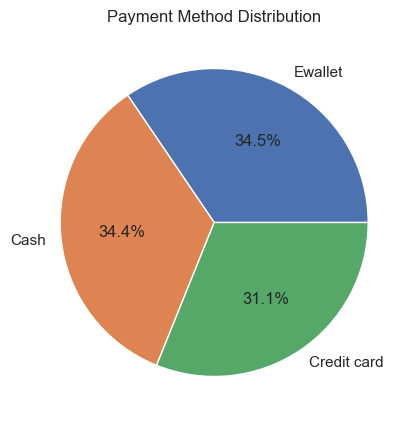

In [47]:
plt.figure(figsize=(5,5))
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


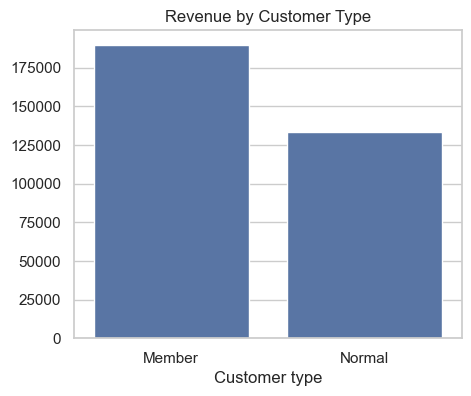

In [48]:
customer_sales = df.groupby('Customer type')['Sales'].sum()

plt.figure(figsize=(5,4))
sns.barplot(x=customer_sales.index, y=customer_sales.values)
plt.title("Revenue by Customer Type")
plt.show()


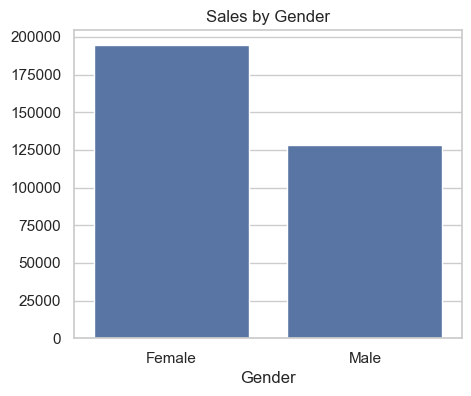

In [49]:
gender_sales = df.groupby('Gender')['Sales'].sum()

plt.figure(figsize=(5,4))
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title("Sales by Gender")
plt.show()


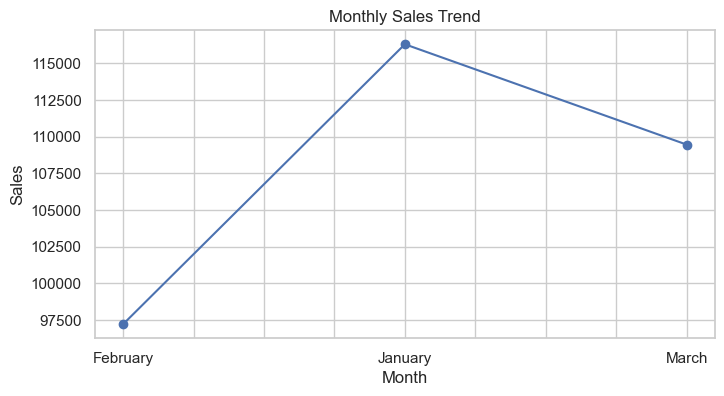

In [50]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


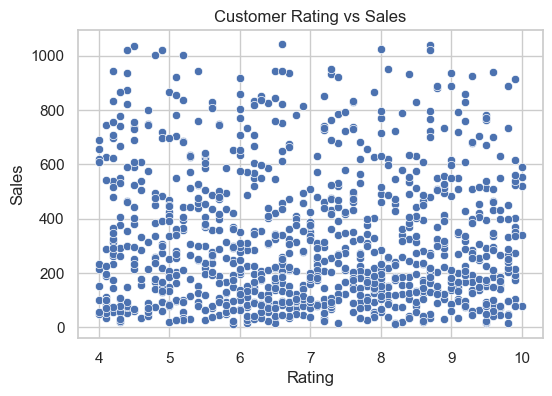

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Rating', y='Sales', data=df)
plt.title("Customer Rating vs Sales")
plt.show()


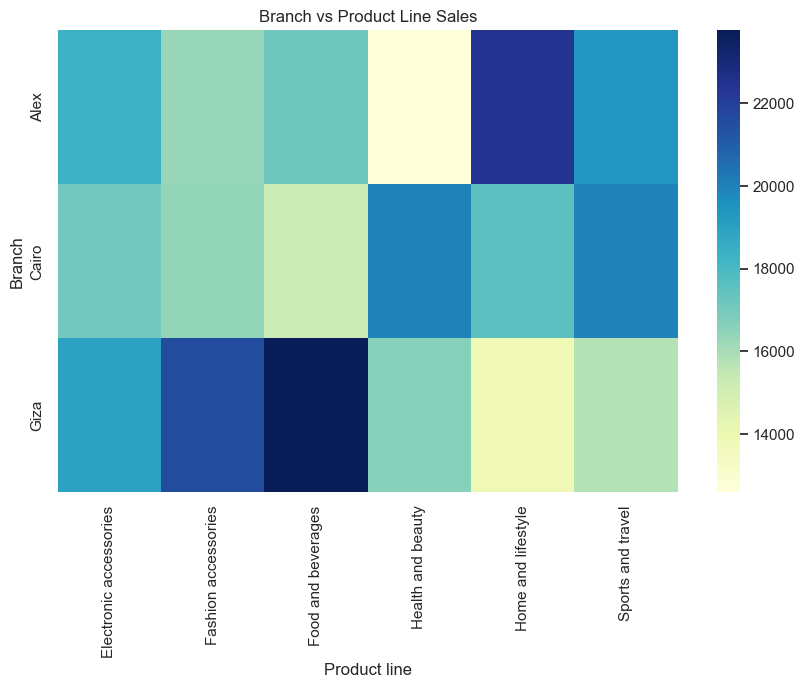

In [52]:
pivot = pd.pivot_table(
    df,
    values='Sales',
    index='Branch',
    columns='Product line',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Branch vs Product Line Sales")
plt.show()


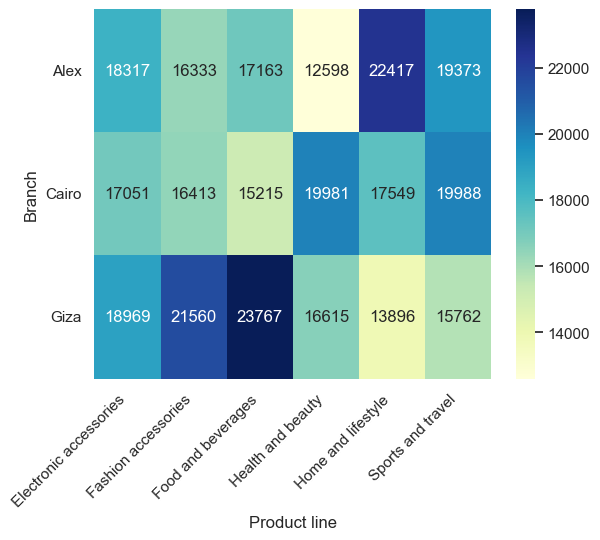

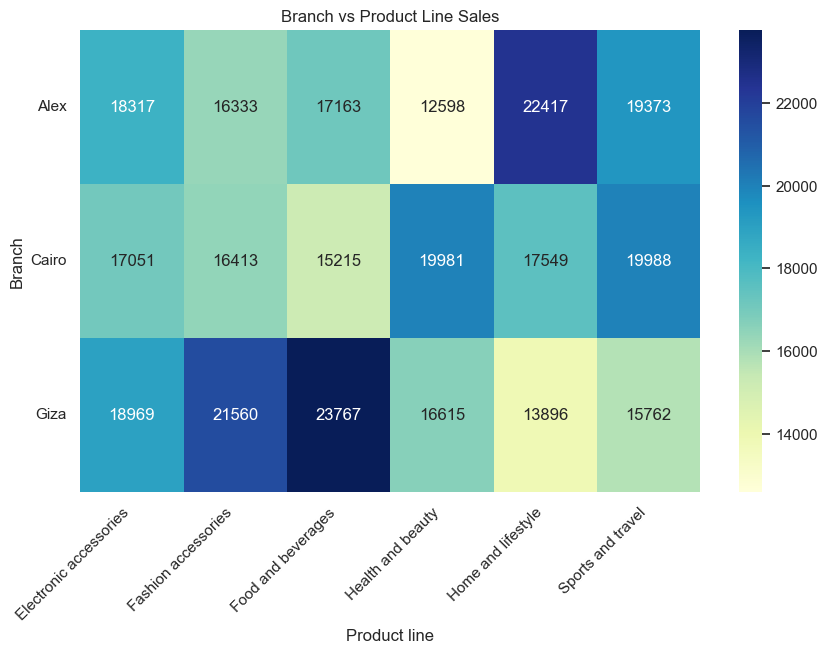

In [56]:
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Branch vs Product Line Sales")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


